# Project 2

# Group 2:
Katherine Evers, Juliann McEachern, Anthony Munoz, Mia Siracusa

### Project Overview

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3. What can you infer about each of the distinct groups?

You may work in a small group on the project. Your code and analysis should be delivered in an IPython Notebook by end of day Wednesday, June 26. 

In a 2-node dataset, "there are two different types of nodes and links determine relationships between one set of nodes and the other (Tsvetovat & Kouznetsov 96)." Our chosen dataset contains information on how many times actors from "Love Actually" appear in the same scenes together. The screenplay of this movie follows 10 separate stories involving a wide variety of individuals, many of whom interlink as the movie progresses. This data is provided by Five Thirty Eight and available on github.

### Step 1

In [20]:
# Load packages
import pandas as pd
import networkx as nx

In [21]:
# Read csv file from github
data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/love-actually/love_actually_adjacencies.csv', index_col=0)
data


,bill_nighy,keira_knightley,andrew_lincoln,hugh_grant,colin_firth,alan_rickman,heike_makatsch,laura_linney,emma_thompson,liam_neeson,kris_marshall,abdul_salis,martin_freeman,rowan_atkinson
actors,,,,,,,,,,,,,,
bill_nighy,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keira_knightley,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
andrew_lincoln,2,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hugh_grant,2,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
colin_firth,1,2.0,2.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alan_rickman,1,1.0,2.0,3.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heike_makatsch,0,0.0,1.0,1.0,0.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
laura_linney,1,3.0,4.0,1.0,2.0,4.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
emma_thompson,1,1.0,2.0,3.0,1.0,9.0,3.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN


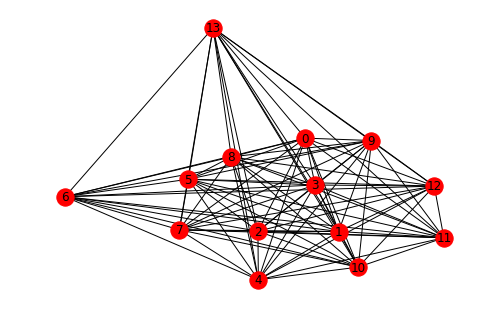

In [38]:
# Store network nodes and edges 
G = nx.Graph(data.values)
# Draw network graph
nx.draw(G, with_labels=True)

### Reference:

Social Network Analysis for Startups, Maksim Tsvetovat and Alexander Kouznetsov, O'Reilly, Sep 30, 201

In [39]:
def trim_edges(G, weight=1):
    G2=nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['weight'] > weight:
            G2.add_edge(f,to,edata)
    return G2

In [48]:
def island_method(G, iterations=5):
    weights= [edata['weight'] for self,f,to,edata in G.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of step
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(G, threshold)] for threshold in range(mn,mx,step)]

In [57]:
cc=list(nx.connected_component_subgraphs(G))[0]

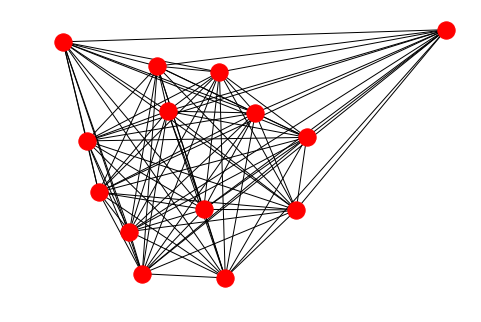

In [55]:
nx.draw(cc)

In [53]:
islands=island_method(cc)

ValueError: need more than 3 values to unpack

In [54]:
#print threshhold, number of nodes, number of islands
for i in islands:
    print i[0],len(i[1]),len(list(net.connected_component_subgraphs(i[1])))

NameError: name 'islands' is not defined

In [45]:
islands2=islands[2][1]

NameError: name 'islands' is not defined

In [ ]:
import triadic
import draw_triads

In [60]:
census, node_census = triadic.triadic_census(islands2)
census

NameError: name 'triadic' is not defined

In [61]:
cliques = list(nx.find_cliques(islands2))

NameError: name 'islands2' is not defined